In [1]:
import mef # Importa la funcion mef.py
import numpy as np # Librería de algebra lineal
import matplotlib.pyplot as plt # Librería de gráficos




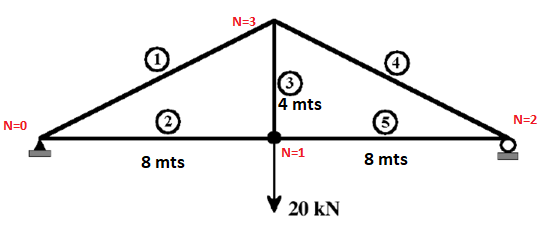

Matriz de nodos

In [2]:
MN = np.array([[0, 0, 0], #fila por cada nodo, coordenadas "x,y,z" de cada nodo en columnas
               [8, 0, 0],
               [16, 0, 0],
               [8, 4, 0]])
Nn = MN.shape[0]

Matriz de conectividad

In [3]:
MC = np.array([[0, 3], #fila por cada barra, y en columnas, los nodos que las conforman
               [0, 1],
               [1, 3],
               [2, 3],
               [1, 2]])

In [4]:
glxn=2 #grados de libertad por nodo

In [5]:
s = np.array([0,1,5])
r = np.array([i for i in range(Nn*glxn) if i not in s])
Fr = [[0],[-20000],[0],[0],[0]]
Us = [[0],[0],[0]]

In [6]:
E=np.array([1, 1, 1, 1, 1])*2.1E11 #modulo elastico para cada elemento
A=np.array([1, 1, 2, 1, 1])*1E-3 #area transversal para cada elemento

In [7]:
K = mef.Kglobal(MN, MC, E, A, glxn)

Para mejorar la visualizacion de la matriz k:

In [8]:
np.set_printoptions(precision=2, linewidth=150)

In [9]:
#K[np.abs(K) < 1e-16] = 0

In [10]:
K/K.max()

array([[ 3.94e-01,  8.21e-02, -2.29e-01,  0.00e+00,  0.00e+00,  0.00e+00, -1.64e-01, -8.21e-02],
       [ 8.21e-02,  4.10e-02,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -8.21e-02, -4.10e-02],
       [-2.29e-01,  0.00e+00,  4.59e-01,  0.00e+00, -2.29e-01,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  9.18e-01,  0.00e+00,  0.00e+00,  0.00e+00, -9.18e-01],
       [ 0.00e+00,  0.00e+00, -2.29e-01,  0.00e+00,  3.94e-01, -8.21e-02, -1.64e-01,  8.21e-02],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -8.21e-02,  4.10e-02,  8.21e-02, -4.10e-02],
       [-1.64e-01, -8.21e-02,  0.00e+00,  0.00e+00, -1.64e-01,  8.21e-02,  3.28e-01, -3.26e-17],
       [-8.21e-02, -4.10e-02,  0.00e+00, -9.18e-01,  8.21e-02, -4.10e-02, -3.26e-17,  1.00e+00]])

In [11]:
F, U = mef.solve(K, r, Fr, s, Us)

<div style="background:#999900">estas lineas se las reusaron todos je! igual me copa lo de imprimir con formato!</div>

In [12]:
# np.set_printoptions(formatter={"float": lambda x: "%0.2f"% (x)})
print('\033[4m'+f'\nVector fuerzas' +'\033[0m'+'[mN]:\n\033[m'+f'F = \n{F*1000}\n'+'\033[0m')
print('\033[4m'+f'Vector desplazamientos'+'\033[0m'+'[mm]:\n\033[m'+ f'U =\n {U*1000} \n')


Vector fuerzas[mN]:
F = 
[[ 7.28e-09]
 [ 1.00e+07]
 [ 0.00e+00]
 [-2.00e+07]
 [ 0.00e+00]
 [ 1.00e+07]
 [ 0.00e+00]
 [ 0.00e+00]]

Vector desplazamientos[mm]:
U =
 [[ 0.  ]
 [ 0.  ]
 [ 0.76]
 [-3.84]
 [ 1.52]
 [ 0.  ]
 [ 0.76]
 [-3.65]] 



<div style="background:#999900">Nadie me hizo este dibujito</div>

In [13]:
plt.rc('figure', figsize=(12,8))
plt.rc('font', size=20)

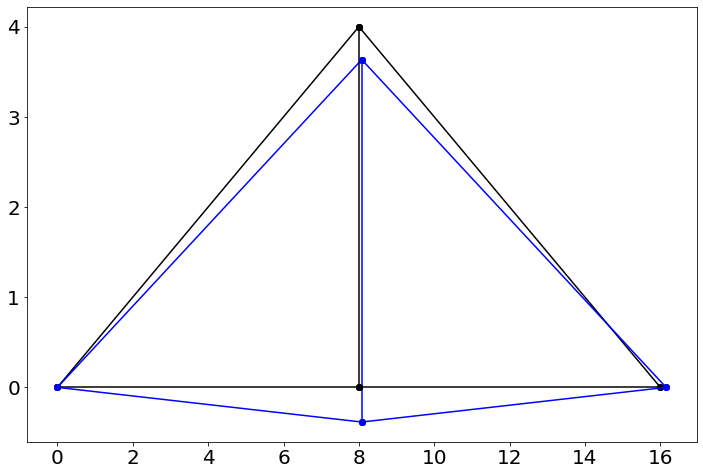

In [14]:
DXY = np.reshape(U, (len(MN),2))

MND = MN[:,:2] +DXY*100

fig, ax = plt.subplots()
for L in MC:
    ax.plot(MN[L,0], MN[L,1], '-ok')
    ax.plot(MND[L,0], MND[L,1], '-ob')
    

<div style="background:#999900">te faltarían  las tensiones. las podes calcular viendo las nuevas longitudes de las barras a partir de la nueva MND y luego calculando los $\varepsilon = \dfrac{\Delta L}{L}$</div>